In [2]:
#Importing Packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import seaborn as sns

In [12]:
#Loading data 
data1 = pd.read_excel('Constituencywise.xlsx')
data_young = data1[data1['AGE']<30]
data_young = data_young['AGE']
data_all = data1['AGE']
print(data_young.shape)
print(data_all.shape)

(452,)
(8355,)


In [132]:
#Selecting useful features & Cleaning data
features = ['State Name', 'PC NAME', 'SEX', 'AGE','CATEGORY','OVER TOTAL VOTES POLLED IN CONSTITUENCY']
data2 = data1[features]
#Removing those candidates with a vote% of less than 1%
data3 = data2
#Removing Candidates with Missing values 
X = data3.dropna()
y = X['OVER TOTAL VOTES POLLED IN CONSTITUENCY']
X = X.drop(labels='OVER TOTAL VOTES POLLED IN CONSTITUENCY', axis=1)

In [133]:
#TrainTestSplit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [134]:
#OneHotEncoding
#X_train_ohe = pd.get_dummies(X_train[['SEX', 'AGE']]) 
#X_test_ohe = pd.get_dummies(X_test[['SEX', 'AGE']])
#X_test_ohe.head()

In [135]:
X_trainage= X_train[['AGE']]
X_testage= X_test[['AGE']]
X_graph = data3[['AGE', 'OVER TOTAL VOTES POLLED IN CONSTITUENCY']]

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


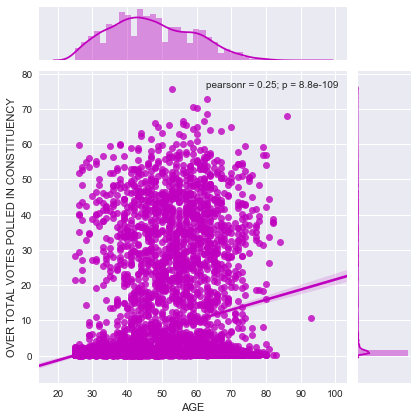

In [136]:
sns.set(style="darkgrid")
g = sns.jointplot("AGE", "OVER TOTAL VOTES POLLED IN CONSTITUENCY", data=X_graph, kind="reg", color="m")

In [137]:
data4 = data3[['AGE', 'OVER TOTAL VOTES POLLED IN CONSTITUENCY']]
data4[['AGE']] = data4[['AGE']]- (data4[['AGE']]%10)
plot = data4.groupby(['AGE']).sum()
plot2 = data4.groupby(['AGE']).size()
plot = pd.DataFrame(plot)
plot2 = pd.DataFrame(plot2)
print(plot)
print(plot2)

      OVER TOTAL VOTES POLLED IN CONSTITUENCY
AGE                                          
20.0                              1190.405351
30.0                              5315.305175
40.0                             11925.516361
50.0                             16036.895001
60.0                             11876.322342
70.0                              3642.881139
80.0                               515.803320
90.0                                10.576396
         0
AGE       
20.0   452
30.0  1858
40.0  2416
50.0  1737
60.0  1109
70.0   250
80.0    22
90.0     1


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [138]:
k_range = range(0,7)
total =0
for k in k_range:
    total = total + plot2.iloc[k]

In [139]:
plot2 = plot2/total
plot2 = plot2*100
print(plot2)

              0
AGE            
20.0   5.762366
30.0  23.686894
40.0  30.800612
50.0  22.144314
60.0  14.138195
70.0   3.187149
80.0   0.280469
90.0   0.012749


In [140]:
x_range = range(0,7)
total2 = 0
for x in x_range:
    total2 = total2+ plot.iloc[x]
print(total2)

OVER TOTAL VOTES POLLED IN CONSTITUENCY    50503.12869
dtype: float64


In [141]:
plot = plot/total2
plot = plot*100 
print(plot)

      OVER TOTAL VOTES POLLED IN CONSTITUENCY
AGE                                          
20.0                                 2.357092
30.0                                10.524705
40.0                                23.613421
50.0                                31.754260
60.0                                23.516013
70.0                                 7.213179
80.0                                 1.021329
90.0                                 0.020942


In [142]:
plot2['Vote percentage share'] = plot[['OVER TOTAL VOTES POLLED IN CONSTITUENCY']]

In [146]:
plot2 = plot2.rename(columns={0: 'Candidate population share'})

In [147]:
plot2

,Candidate population share,Vote percentage share
AGE,,
20.0,5.762366,2.357092
30.0,23.686894,10.524705
40.0,30.800612,23.613421
50.0,22.144314,31.754260
60.0,14.138195,23.516013
70.0,3.187149,7.213179
80.0,0.280469,1.021329
90.0,0.012749,0.020942
